In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import datasets
from matplotlib import patheffects
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from scipy.spatial import distance
import scipy.cluster.hierarchy as sch

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join( '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rnd = np.random.RandomState(RANDOM_STATE)

CMAP = plt.cm.rainbow
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

NOISE = 0.1
N_SAMPLE = 1000
ALPHA = 0.001

<Figure size 640x480 with 0 Axes>

In [3]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [4]:
def fn_plot_scatter(X, labels):
    '''
    X: Feature matrix
    labels: target data
    '''
    # How many classes
    num_classes = len(np.unique(labels))
    
    # Create a color palette with one color per class
    palette = np.array(sns.color_palette("hls", num_classes))
    
    # instantiate a figure
    fig, ax = plt.subplots()
    
    # aspect ratio of the figure
    ax.set_aspect('auto')
    
    ax.scatter(X[:,0], X[:,1], s = 15, c = palette[labels.astype(np.int16)], edgecolors = 'k')
    
    ax.axis('off')
    ax.axis('tight')
    
    for i in np.unique(labels):
        
        # Position of each label at median of data points.
        xtext, ytext = np.median(X[labels == i, :], axis = 0)
        
        # Plot labels 'str(i)' at median point
        txt = ax.text(xtext, ytext, str(i), fontsize = 20, color = palette[i])
        
        # Mark with text effects
        txt.set_path_effects([
            patheffects.Stroke(linewidth = 5, foreground = 'yellow'),
            patheffects.Normal()])

    return

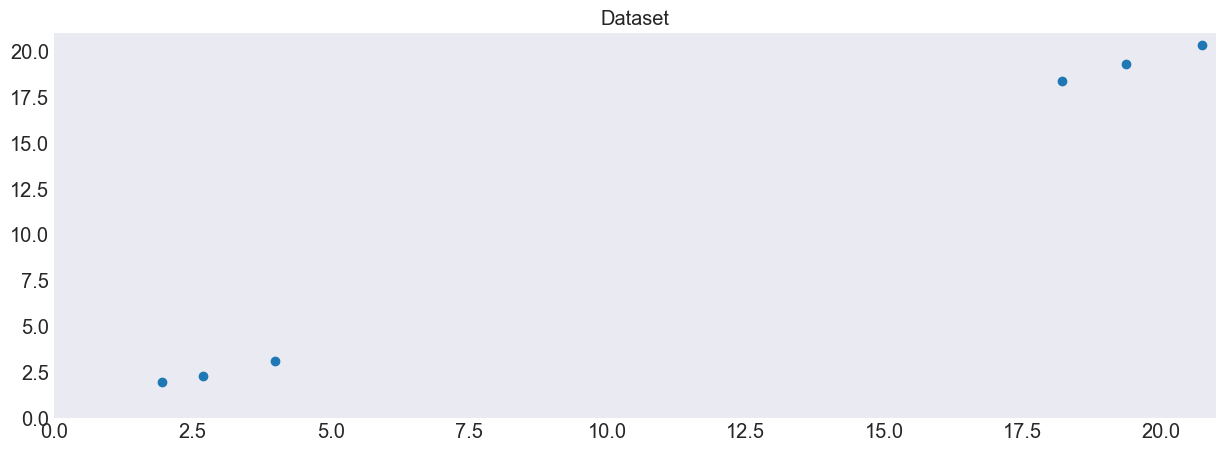

In [5]:
# Toy Dataset
x_axis = np.array([1,2,3,18,19,20]) + rnd.uniform(0,1, size = 6)

y_axis = np.array([1,2,3,18,19,20]) + rnd.uniform(0,1, size = 6)

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.grid()
plt.show()

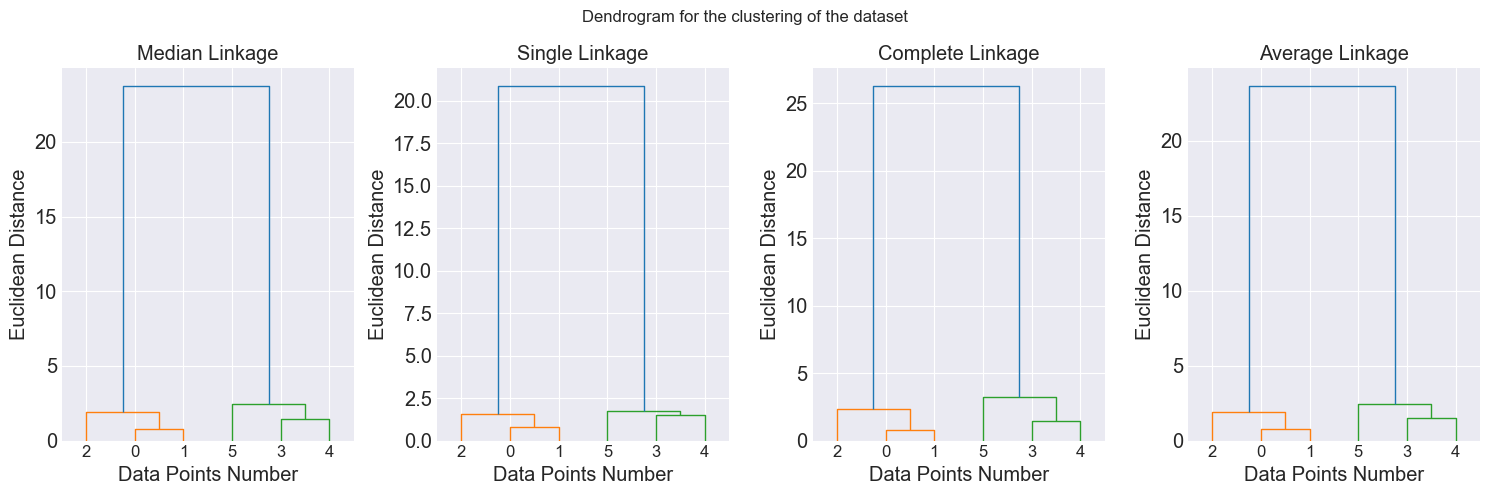

In [6]:
fig, axes = plt.subplots(1,4)

Z_median = sch.linkage(data, method = 'median')

Z_single = sch.linkage(data, method = 'single')

Z_complete = sch.linkage(data, method = 'complete')

Z_average = sch.linkage(data, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title('Median Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title('Single Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title('Complete Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[3]
den = sch.dendrogram(Z_average, ax = ax)
ax.set_title('Average Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

fig.suptitle('Dendrogram for the clustering of the dataset')

plt.tight_layout()

### Aggolimerative Clustering Model

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
cluster_H = AgglomerativeClustering(n_clusters=2,linkage='average')

model_clt = cluster_H.fit(data)

print(model_clt)

print('\n')

data['clusters']=model_clt.labels_

print('Clusters assinged to each datapoints, cluster = 2:')

display(data)

AgglomerativeClustering(linkage='average')


Clusters assinged to each datapoints, cluster = 2:


,x,y,clusters
0,1.96,2.00,1
1,2.70,2.32,1
2,4.00,3.14,1
3,18.22,18.38,0
4,19.36,19.32,0
5,20.74,20.37,0


In [9]:
from sklearn.datasets import load_iris

iris = load_iris()       # loading dataset from sklearn

#print(iris.DESCR)     # discriptions tells us what's in the dataset

iris_df = pd.DataFrame(iris.data)    # get the data in a dataframe
iris_df.columns = iris.feature_names   # adding column names
iris_df['labels']=iris.target     # add a target column
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
features_df = pd.DataFrame(iris.data)
features_df.columns = iris.feature_names
labels = iris_df['labels'].to_numpy()
features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


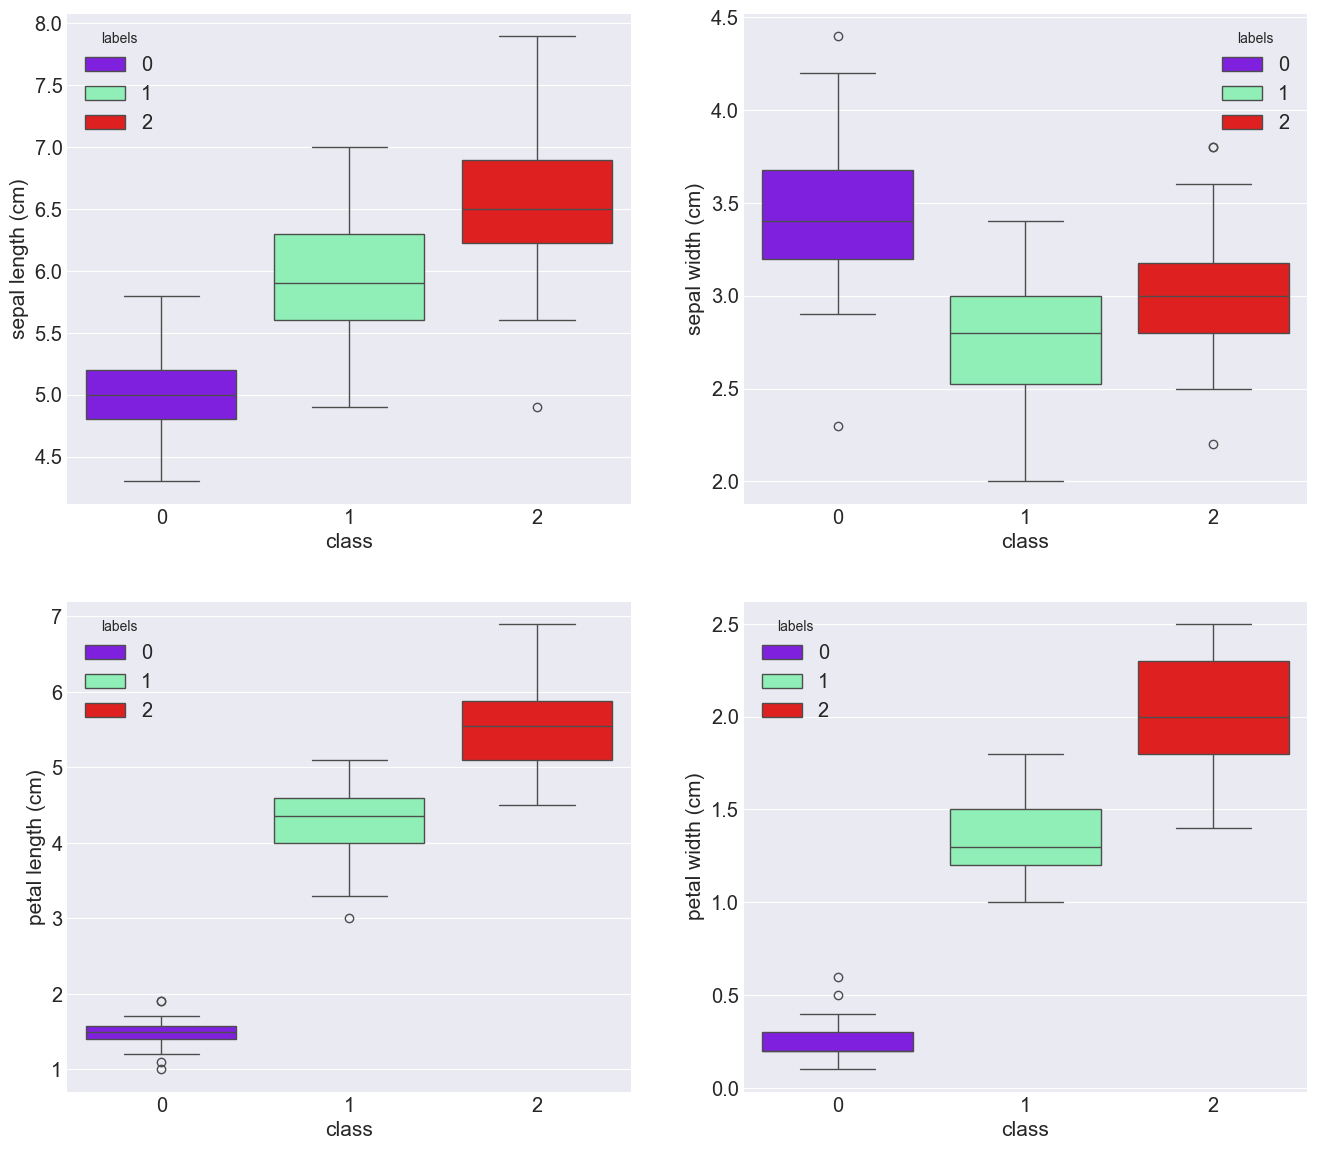

In [11]:
plt.figure(figsize=(16,14))

for i,col in enumerate(features_df.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=features_df,
                 x=iris_df.labels,y=features_df[col],
                 hue=iris_df.labels,palette=CMAP)
    
    plt.xlabel('class',fontsize=15)
    plt.ylabel(col, fontsize = 15)

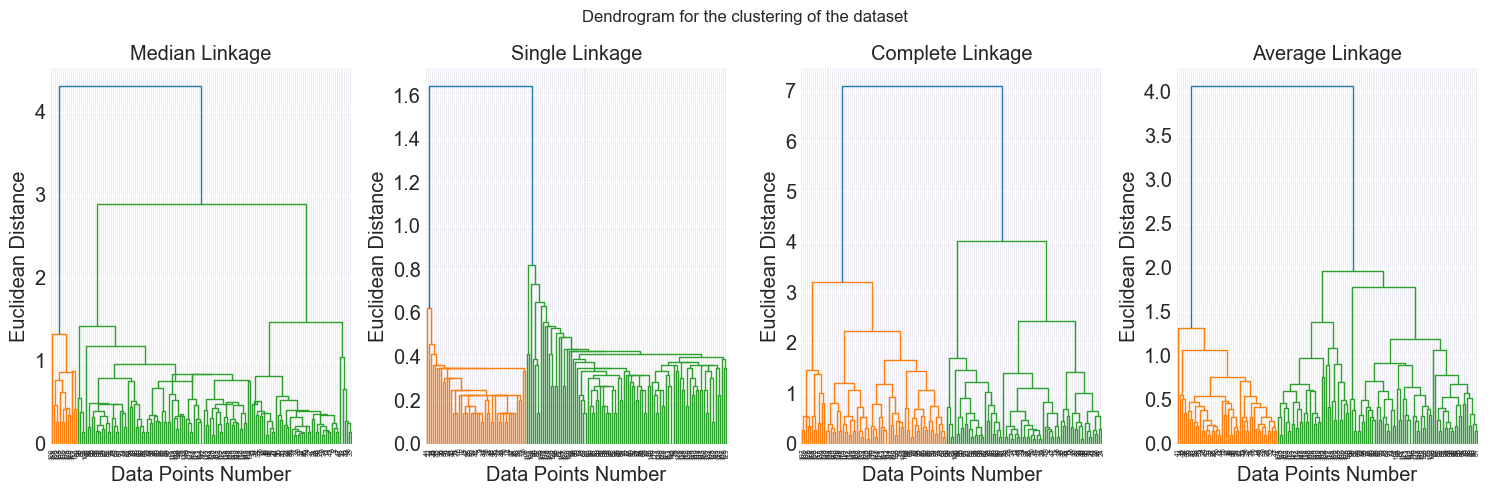

In [12]:
fig, axes = plt.subplots(1,4)

Z_median = sch.linkage(features_df, method = 'median')

Z_single = sch.linkage(features_df, method = 'single')

Z_complete = sch.linkage(features_df, method = 'complete')

Z_average = sch.linkage(features_df, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title('Median Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title('Single Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title('Complete Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[3]
den = sch.dendrogram(Z_average, ax = ax)
ax.set_title('Average Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

fig.suptitle('Dendrogram for the clustering of the dataset')

plt.tight_layout()

In [13]:
cluster_H = AgglomerativeClustering(n_clusters=3,linkage='average')

model_clt = cluster_H.fit(features_df)

print(model_clt)

print('\n')

features_df['clusters']=model_clt.labels_

print('Clusters assinged to each datapoints, cluster = 2:')

display(features_df.tail(20))

features_df.drop('clusters',axis = 1, inplace=True)

AgglomerativeClustering(linkage='average', n_clusters=3)


Clusters assinged to each datapoints, cluster = 2:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,0
134,6.1,2.6,5.6,1.4,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,0
139,6.9,3.1,5.4,2.1,2


In [14]:
model_clt.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [15]:
features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn.metrics import silhouette_score

In [17]:
sil_score_max = 0

for k in range(2,10):
    
    cluster_H = AgglomerativeClustering(n_clusters = k, linkage = 'average')
    
    model_clt = cluster_H.fit(features_df)
    
    label = model_clt.labels_
    
    sil_coeff = silhouette_score(features_df, label, metric = 'euclidean')
    
    if sil_coeff > sil_score_max:
        sil_score_max = sil_coeff
        best_cluster = k
        
    print('For cluster= {}, Silhouette Coefficient is {:.5f}'.format(k, sil_coeff))
    
print('\n')
print(f'For Cluster: {best_cluster} Silhouette Value {sil_score_max:.4f} is highest')

For cluster= 2, Silhouette Coefficient is 0.68674
For cluster= 3, Silhouette Coefficient is 0.55416
For cluster= 4, Silhouette Coefficient is 0.47199
For cluster= 5, Silhouette Coefficient is 0.43067
For cluster= 6, Silhouette Coefficient is 0.34199
For cluster= 7, Silhouette Coefficient is 0.37074
For cluster= 8, Silhouette Coefficient is 0.36588
For cluster= 9, Silhouette Coefficient is 0.31668


For Cluster: 2 Silhouette Value 0.6867 is highest


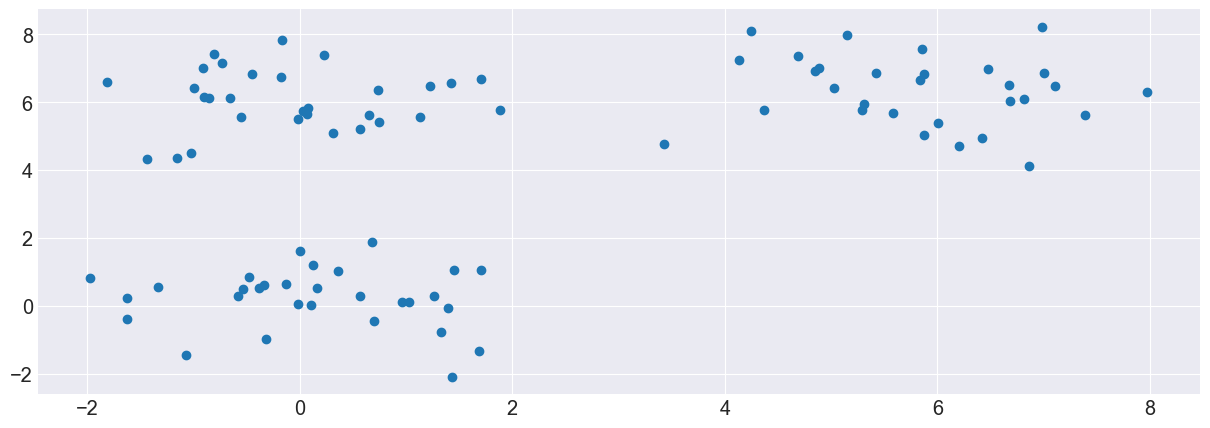

In [18]:
D = 2    # two columns: so we can visualize it more easily
s = 6    # separation so we can control how far apart the means are

# where do you want your mean?
mu1 = np.array([0,0])
mu2 = np.array([s,s])
mu3 = np.array([0,s])

N = 90     # number of samples
X = np.zeros((N,D))

X[:30,:] = np.random.randn(30,D) + mu1     # first cluster at (0,0)
X[30:60,:] = np.random.randn(30,D) + mu2    # second cluster at (6,6)
X[60:,:] = np.random.randn(30,D) + mu3      # third cluster at (0,6)

plt.scatter(X[:,0], X[:,1])

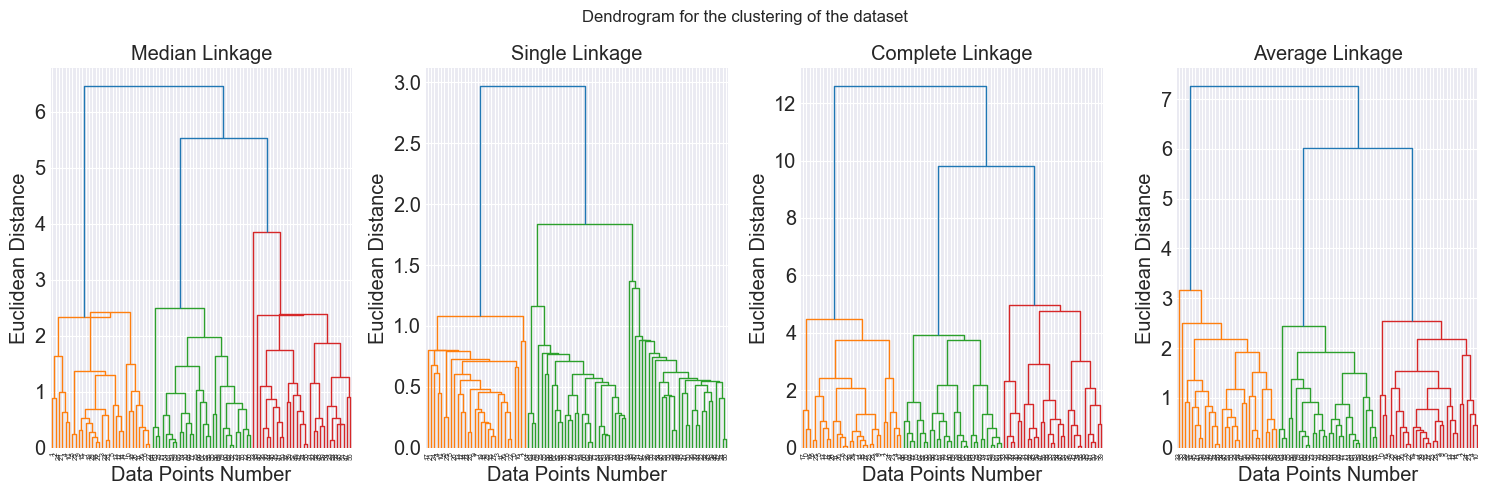

In [19]:
fig, axes = plt.subplots(1,4)

Z_median = sch.linkage(X, method = 'median')

Z_single = sch.linkage(X, method = 'single')

Z_complete = sch.linkage(X, method = 'complete')

Z_average = sch.linkage(X, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title('Median Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title('Single Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title('Complete Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

ax = axes[3]
den = sch.dendrogram(Z_average, ax = ax)
ax.set_title('Average Linkage')
ax.set_xlabel('Data Points Number')
ax.set_ylabel('Euclidean Distance')

fig.suptitle('Dendrogram for the clustering of the dataset')

plt.tight_layout()

In [20]:
sil_score_max = 0

for k in range(2,10):
    
    cluster_H = AgglomerativeClustering(n_clusters = k, linkage = 'average')
    
    model_clt = cluster_H.fit(X)
    
    label = model_clt.labels_
    
    sil_coeff = silhouette_score(X, label, metric = 'euclidean')
    
    if sil_coeff > sil_score_max:
        sil_score_max = sil_coeff
        best_cluster = k
        
    print('For cluster= {}, Silhouette Coefficient is {:.5f}'.format(k, sil_coeff))
    
print('\n')
print(f'For Cluster: {best_cluster} Silhouette Value {sil_score_max:.4f} is highest')

For cluster= 2, Silhouette Coefficient is 0.53616
For cluster= 3, Silhouette Coefficient is 0.69015
For cluster= 4, Silhouette Coefficient is 0.53350
For cluster= 5, Silhouette Coefficient is 0.43024
For cluster= 6, Silhouette Coefficient is 0.35652
For cluster= 7, Silhouette Coefficient is 0.30370
For cluster= 8, Silhouette Coefficient is 0.34376
For cluster= 9, Silhouette Coefficient is 0.34175


For Cluster: 3 Silhouette Value 0.6902 is highest


### Proximity Matrix

#### pairwise metric distance

In [21]:
from sklearn.metrics.pairwise import pairwise_distances

In [22]:
data = np.array([[1,2],[3,4],[5,6],[7,8]])

# compute the pairwise Euclidean distances
proximity_matrix = pairwise_distances(data, metric = 'euclidean')

# print the proximity matrix
pd.DataFrame(proximity_matrix)

,0,1,2,3
0,0.00,2.83,5.66,8.49
1,2.83,0.00,2.83,5.66
2,5.66,2.83,0.00,2.83
3,8.49,5.66,2.83,0.00


### Elbow Method

In [23]:
from sklearn.cluster import KMeans

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = RANDOM_STATE)

kmeans.fit(X)

y_pred = kmeans.predict(X)

print("Centers :\n", np.round(kmeans.cluster_centers_, decimals = 2))
print(f"Sum of Square Error / WCSS is : {kmeans.inertia_:.2f}",)

Centers :
 [[ 1.18 -0.08]
 [-0.24  0.59]]
Sum of Square Error / WCSS is : 417.37


For cluster = 1, SSE/WCSS is 681.371
For cluster = 2, SSE/WCSS is 152.348
For cluster = 3, SSE/WCSS is 78.856
For cluster = 4, SSE/WCSS is 57.384
For cluster = 5, SSE/WCSS is 49.828
For cluster = 6, SSE/WCSS is 45.098
For cluster = 7, SSE/WCSS is 34.531
For cluster = 8, SSE/WCSS is 36.125
For cluster = 9, SSE/WCSS is 28.299
For cluster = 10, SSE/WCSS is 27.123
For cluster = 11, SSE/WCSS is 24.915
For cluster = 12, SSE/WCSS is 24.034
For cluster = 13, SSE/WCSS is 22.144
For cluster = 14, SSE/WCSS is 22.233
For cluster = 15, SSE/WCSS is 19.956
For cluster = 16, SSE/WCSS is 19.226
For cluster = 17, SSE/WCSS is 17.620
For cluster = 18, SSE/WCSS is 17.416
For cluster = 19, SSE/WCSS is 16.290


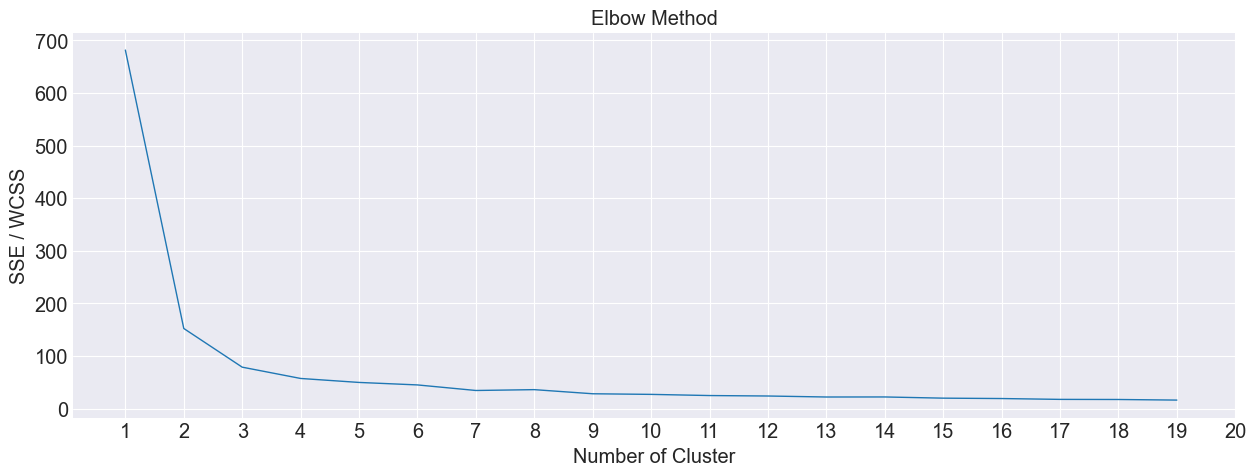

In [40]:
sse = {}
     
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', max_iter = 100).fit(features_df)
    sse[k] = kmeans.inertia_
    print(f"For cluster = {k}, SSE/WCSS is {sse[k]:.3f}")
    
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.xticks(np.arange(1,21,1.0))
plt.ylabel("SSE / WCSS")
plt.title("Elbow Method")
plt.show()

For cluster = 1, SSE/WCSS is 1027.844
For cluster = 2, SSE/WCSS is 417.366
For cluster = 3, SSE/WCSS is 285.694
For cluster = 4, SSE/WCSS is 188.020
For cluster = 5, SSE/WCSS is 142.740
For cluster = 6, SSE/WCSS is 126.934
For cluster = 7, SSE/WCSS is 83.750
For cluster = 8, SSE/WCSS is 71.696
For cluster = 9, SSE/WCSS is 56.372
For cluster = 10, SSE/WCSS is 43.958
For cluster = 11, SSE/WCSS is 39.159
For cluster = 12, SSE/WCSS is 35.451
For cluster = 13, SSE/WCSS is 31.335
For cluster = 14, SSE/WCSS is 28.734
For cluster = 15, SSE/WCSS is 24.949
For cluster = 16, SSE/WCSS is 23.733
For cluster = 17, SSE/WCSS is 21.670
For cluster = 18, SSE/WCSS is 20.703
For cluster = 19, SSE/WCSS is 19.146


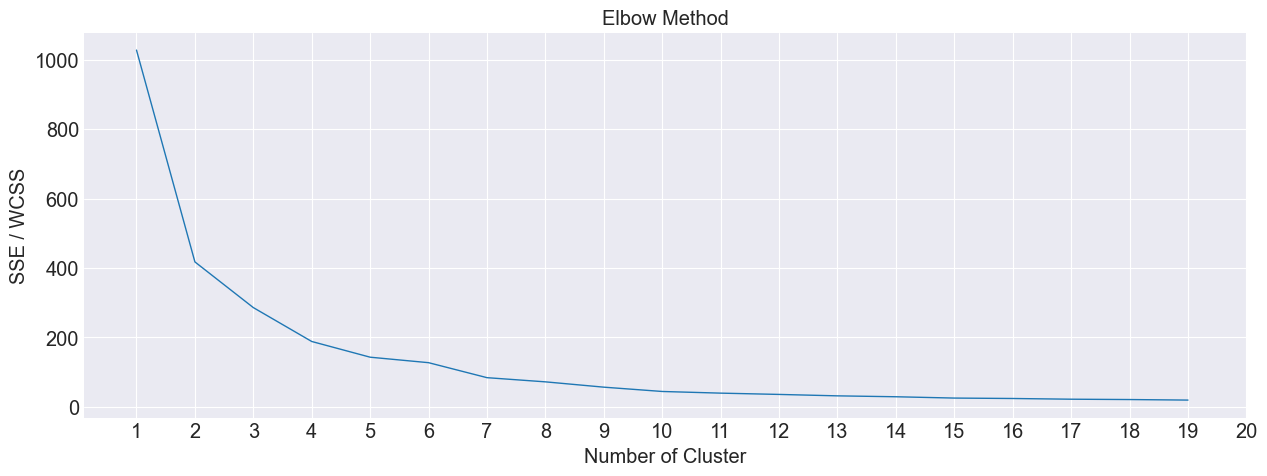

In [41]:
sse = {}

for k in range(1,20):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', max_iter = 100).fit(X)
    sse[k] = kmeans.inertia_
    print(f"For cluster = {k}, SSE/WCSS is {sse[k]:.3f}")
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.xticks(np.arange(1,21,1.0))
plt.ylabel("SSE / WCSS")
plt.title("Elbow Method")
plt.show()

In [42]:
from sklearn.datasets import make_moons

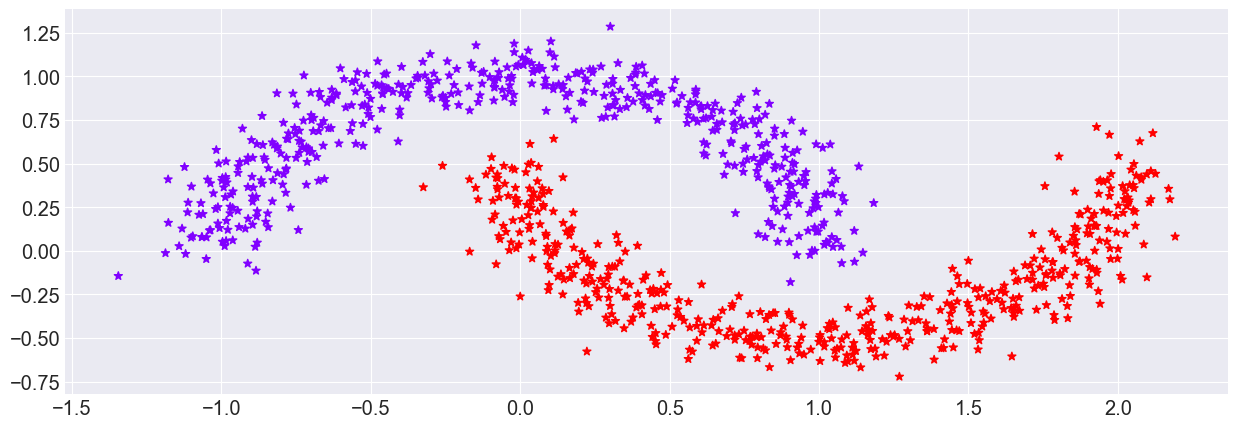

In [43]:
X, y = make_moons(n_samples = N_SAMPLE, shuffle = True,
                 noise = NOISE,
                 random_state = RANDOM_STATE)
plt.figure()
plt.scatter(X[:,0], X[:,1], marker = '*', c = y, cmap = CMAP);

For cluster = 1, SSE/WCSS is 1027.844
For cluster = 2, SSE/WCSS is 417.366
For cluster = 3, SSE/WCSS is 286.054
For cluster = 4, SSE/WCSS is 188.022
For cluster = 5, SSE/WCSS is 142.812
For cluster = 6, SSE/WCSS is 98.774
For cluster = 7, SSE/WCSS is 82.570
For cluster = 8, SSE/WCSS is 65.051
For cluster = 9, SSE/WCSS is 56.426
For cluster = 10, SSE/WCSS is 48.001
For cluster = 11, SSE/WCSS is 38.893
For cluster = 12, SSE/WCSS is 34.195
For cluster = 13, SSE/WCSS is 30.869
For cluster = 14, SSE/WCSS is 28.057
For cluster = 15, SSE/WCSS is 25.754
For cluster = 16, SSE/WCSS is 23.060
For cluster = 17, SSE/WCSS is 21.758
For cluster = 18, SSE/WCSS is 21.820
For cluster = 19, SSE/WCSS is 20.153


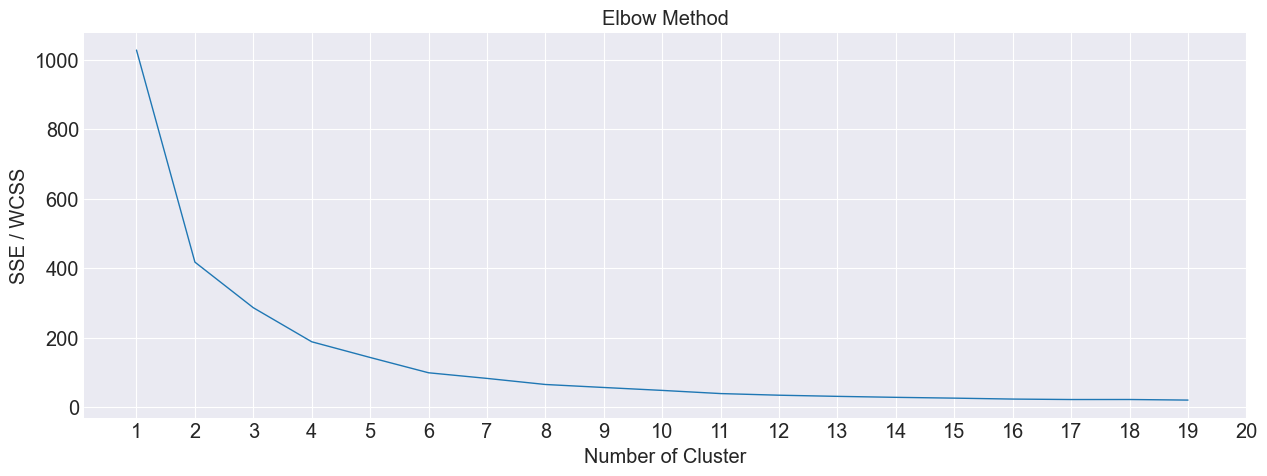

In [44]:
sse = {}

for k in range(1,20):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', max_iter = 100).fit(X)
    sse[k] = kmeans.inertia_
    print(f"For cluster = {k}, SSE/WCSS is {sse[k]:.3f}")
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.xticks(np.arange(1,21,1.0))
plt.ylabel("SSE / WCSS")
plt.title("Elbow Method")
plt.show()

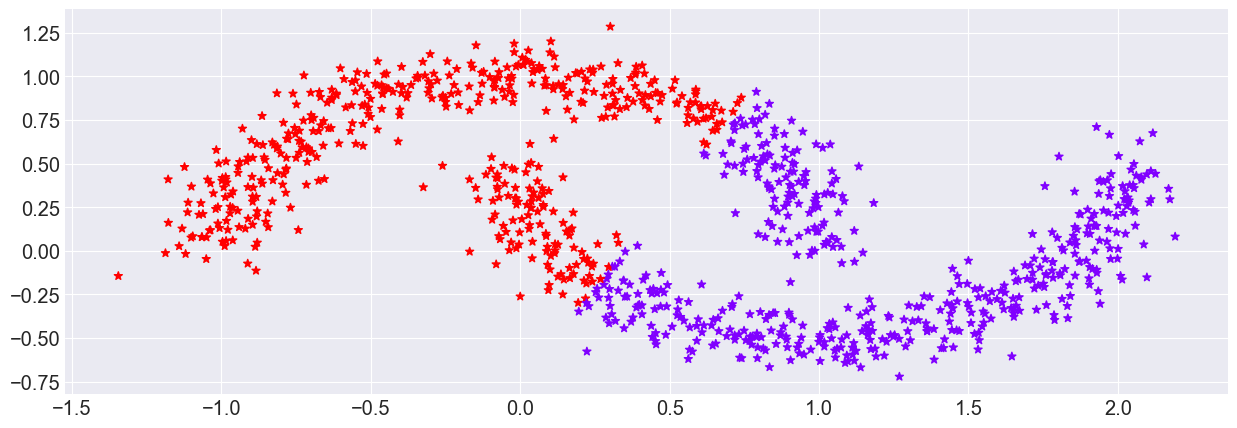

In [45]:
X, y = make_moons(n_samples = N_SAMPLE, shuffle = True,
                 noise = NOISE,
                 random_state = RANDOM_STATE)
plt.figure()
plt.scatter(X[:,0], X[:,1], marker = '*', c = y_pred, cmap = CMAP);

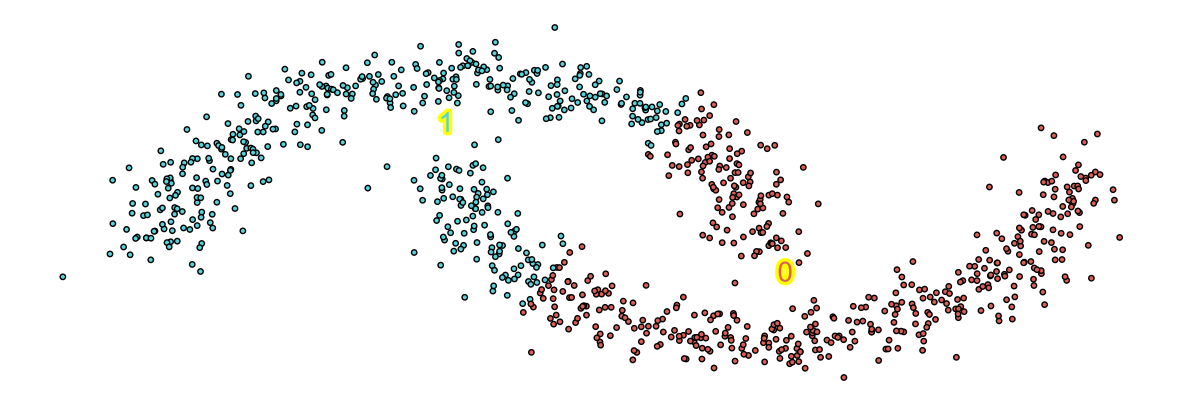

In [46]:
fn_plot_scatter(X,y_pred)

### DB-SCAN

In [48]:
from sklearn.cluster import DBSCAN

In [66]:
clustering = DBSCAN(eps = 0.150, min_samples = 10).fit(X)

y_pred = clustering.labels_

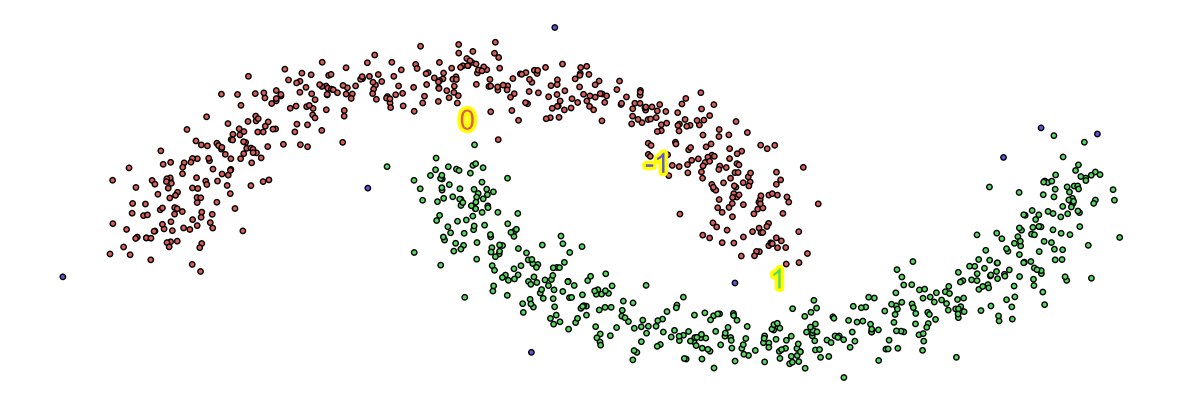

In [67]:
fn_plot_scatter(X, y_pred)

In [94]:
1-y_pred[y_pred == -1].shape[0]/y_pred.shape[0]

0.992

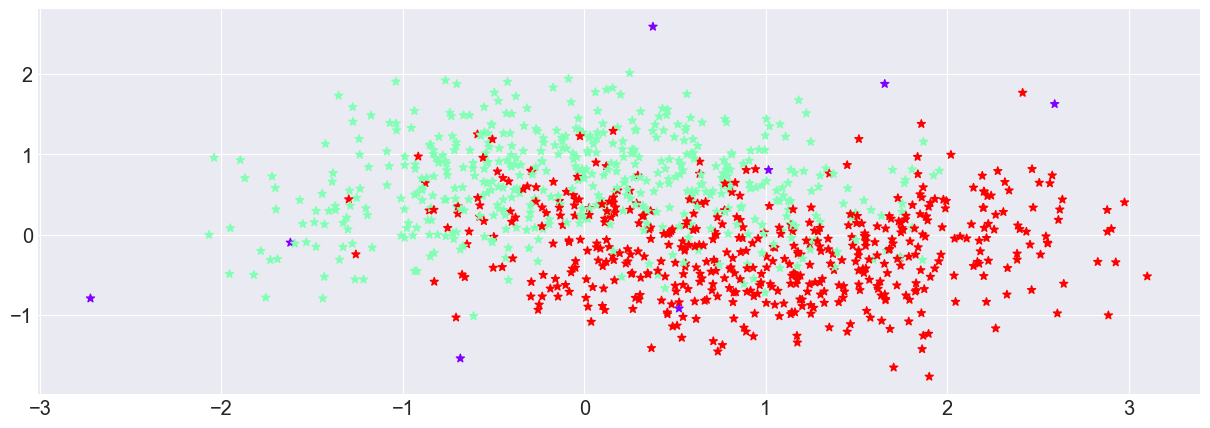

In [99]:
X, y = make_moons(n_samples = N_SAMPLE, shuffle = True,
                 noise = 0.5,
                 random_state = RANDOM_STATE)
plt.figure()
plt.scatter(X[:,0], X[:,1], marker = '*', c = y_pred, cmap = CMAP);

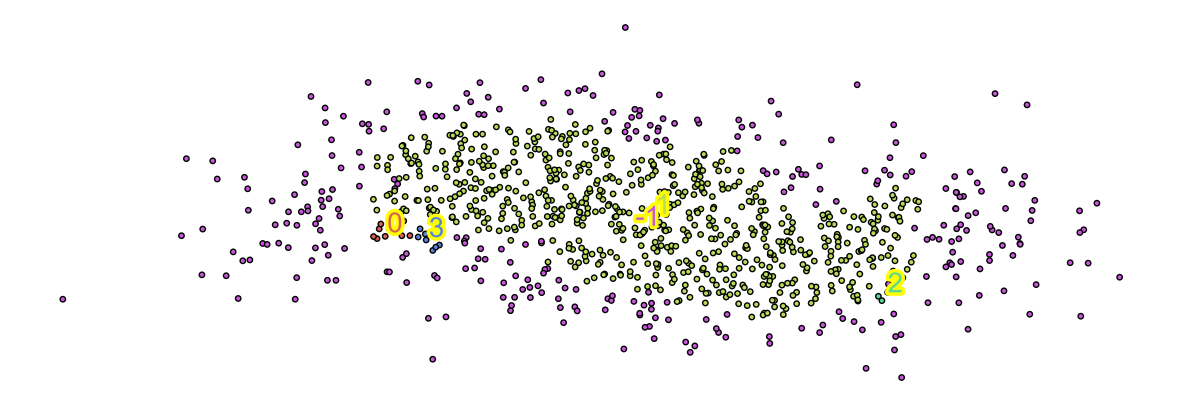

In [100]:
clustering = DBSCAN(eps = 0.150, min_samples = 10).fit(X)

y_pred = clustering.labels_

fn_plot_scatter(X, y_pred)

In [101]:
1-y_pred[y_pred == -1].shape[0]/y_pred.shape[0]

0.694

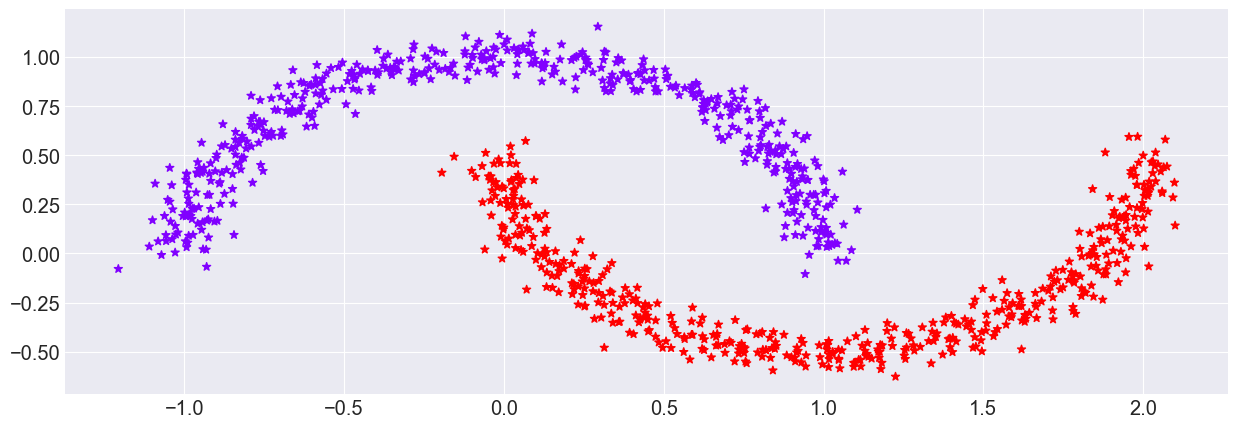

In [117]:
X, y = make_moons(n_samples = N_SAMPLE, shuffle = True,
                 noise = 0.06,
                 random_state = RANDOM_STATE)
plt.figure()
plt.scatter(X[:,0], X[:,1], marker = '*', c = y_pred, cmap = CMAP);

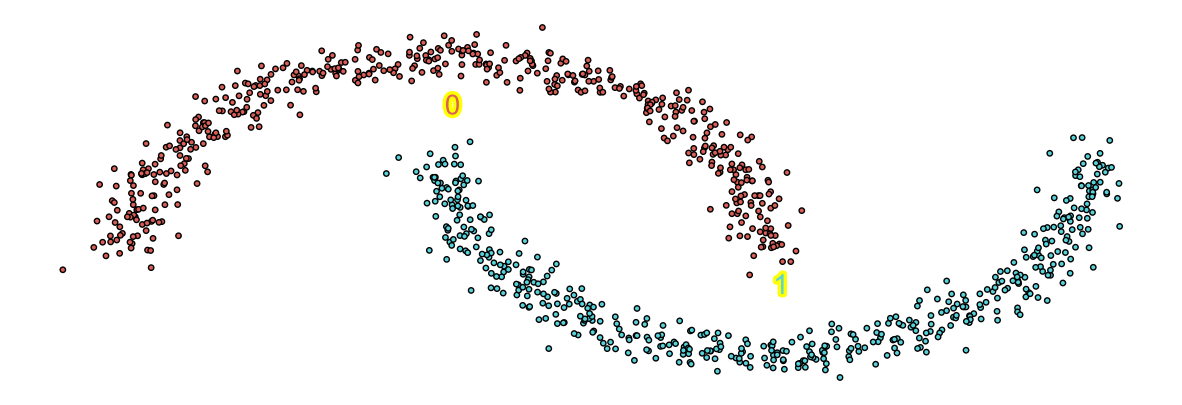

In [118]:
clustering = DBSCAN(eps = 0.150, min_samples = 10).fit(X)

y_pred = clustering.labels_

fn_plot_scatter(X, y_pred)

In [119]:
1-y_pred[y_pred == -1].shape[0]/y_pred.shape[0]

1.0